# Montecarlo Demo

### Import the monte carlo generic simulator(mcgs) package
```python
pip install mcgs

```

In [1]:
from montecarlo import Die, Game, Analyzer

In [2]:
# External python packages
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# Scenarios

## Scenario 1: 2-headed coin

In [5]:
# Let us Create one fair coin (with faces H and T) and one unfair coin.
coin_faces = ['H', 'T']
fair_coin = Die(coin_faces)
unfair_coin = Die(coin_faces)

In [4]:
# By default our coins are fair 
fair_coin.show_state()

,faces,weights
0,H,1.0
1,T,1.0


In [6]:
# For the unfair coin, give one of the faces a weight of 5 and the others 1.
# The below coin is unfairly weighted to head
unfair_coin.change_weight('H' , 5)
unfair_coin.show_state()

,faces,weights
0,H,5.0
1,T,1.0


In [7]:
# You can check the class doc to see all the methods available for use 
# Die.__doc__ , Game.__doc__ , Analyzer.__doc__
Game.__doc__

'\n    PURPOSE:\n    A class to roll one or more dice of the same kind one or more times.\n    Inherits methods from Die class to perform the simulations\n\n    ATTRIBUTES:\n    Takes a list of similarly defined dice (Die Objects/instances).\n\n    METHODS:\n    __init__:: Instantiate a similar Die Objects.\n    play:: Rolls the Dice using the inherited roll_die method from the Die class\n    show:: Display the results of the most recent play\n    -------------------------------------------------------------------------\n    '

In [8]:
# You can check each method doc using the Class.method.__doc__ 
# Let us understand how to construct a Game using the __init__
Game.__init__.__doc__

'\n        PURPOSE:\n        Initializes dice object which is inherited from the Die Class\n\n        INPUTS:\n        Takes one argument which is a List of Dice Objects ([int | str | float])\n\n        OUTPUTS:\n        Assigns internal dice variable for use in multiple areas (DataFrame(int | str | float))\n        '

In [9]:
# You can check other methods that are listed as  ATTRIBUTES in the Game class 
Game.show.__doc__

'\n        PURPOSE:\n        Show the results of the most recent play.\n\n        INPUTS: Takes two arguments the play dataframe (DataFrame(int | str | float)) and df_form (int) that\n        means the default Wide = 1 and Narrow option is 2 as parameters\n\n        OUTPUTS: Display the result of the play result as a dataframe of shape N rolls by M dice.(DataFrame(int |\n        str | float))\n        '

In [10]:
# Let us Play a game of 1000 flips of three coins with all fair dice
# and use the methods we saw above in action
dice = []
dice.extend([fair_coin , fair_coin, fair_coin]) # Playing a Three dice 
coin_game_one = Game(dice)
coin_game_one.show(coin_game_one.play(1000) , 1)  # Displaying results in Wide Dataframe format

,Die 1,Die 2,Die 3
roll number,,,
1,H,T,T
2,H,H,T
3,T,H,T
4,H,T,H
5,T,T,T
...,...,...,...
996,T,T,H
997,T,H,T
998,H,T,H


In [11]:
# Play a game of 1000 flips with two unfair dice and one fair die.
dice = []
dice.extend([unfair_coin , unfair_coin, fair_coin])
coin_game_two = Game(dice)
coin_game_two.show(coin_game_two.play(1000) , 1)  

,Die 1,Die 2,Die 3
roll number,,,
1,T,H,T
2,H,H,H
3,T,T,H
4,H,H,H
5,H,T,T
...,...,...,...
996,H,H,T
997,H,H,H
998,T,H,T


In [12]:
# For each game, use an Analyzer object
# determine the relative frequency of jackpots –> getting either all Hs or all Ts.
coin_analyzer_one = Analyzer(coin_game_one)
coin_analyzer_two = Analyzer(coin_game_two)

In [13]:
coin_analyzer_one.jackpot()

246

In [14]:
coin_analyzer_two.jackpot()

263

In [15]:
# Compute relative frequency as the number of jackpots over the total number of rolls(1000)
coin_relative_frequency_one = coin_analyzer_one.jackpot() / 1000
coin_relative_frequency_one

0.246

In [16]:
coin_relative_frequency_two = coin_analyzer_two.jackpot() / 1000
coin_relative_frequency_two

0.263

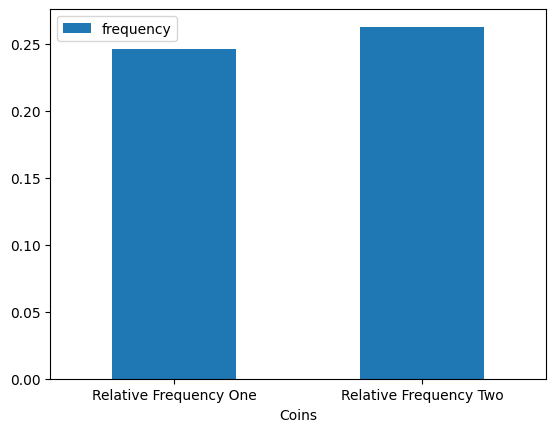

In [17]:
df = pd.DataFrame({'Coins':['Relative Frequency One', 'Relative Frequency Two'], 
                   'frequency':[coin_relative_frequency_one,coin_relative_frequency_two]})
ax = df.plot.bar(x='Coins', y='frequency', rot=0)

In [18]:
coin_analyzer_two.combo()

8

## Scenario 2: 6-sided die

In [19]:
# Create a fair die and two unfair dice, all of six sides with the faces 1 through 6 
# for this scenario
# First create a fair die 
fair_die_faces = [1, 2, 3, 4, 5, 6]
fair_die = Die(fair_die_faces)
fair_die.show_state()

,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


In [20]:
# One unfair die (Type 1) will weight 6 five times more than the others 
# (i.e. it has weight of 5 and the others a weight of 1 each).
unfair_type_one_faces = [1, 2, 3, 4, 5, 6]
unfair_type_one_die = Die(unfair_type_one_faces) 
unfair_type_one_die.show_state()

,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


In [21]:
# The below die is type one unfairly weighted to face six 
unfair_type_one_die.change_weight(6 , 5)
unfair_type_one_die.show_state()

,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [22]:
# The other unfair die (Type 2) will weight 1 five times more than the others.
unfair_type_two_faces = [1, 2, 3, 4, 5, 6]
unfair_type_two_die = Die(unfair_type_two_faces) 
unfair_type_two_die.show_state()

,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


In [23]:
# Set the values of the other die faces to one fifth of one
[unfair_type_two_die.change_weight(i , 0.2) for i in unfair_type_two_faces[:-1]]
unfair_type_two_die.show_state()

,faces,weights
0,1,0.2
1,2,0.2
2,3,0.2
3,4,0.2
4,5,0.2
5,6,1.0


In [24]:
# Let us Play a game of 10000 rolls with 5 fair dice 
dice = []
dice.extend([fair_die , fair_die, fair_die, fair_die, fair_die]) # Playing a Five Fair dice 
dice_game_one = Game(dice)
dice_game_one.show(dice_game_one.play(10000) , 1)  # Displaying results in Wide Dataframe format

,Die 1,Die 2,Die 3,Die 4,Die 5
roll number,,,,,
1,6,4,6,3,2
2,1,4,5,4,3
3,1,6,3,6,6
4,1,1,1,5,2
5,2,6,1,1,5
...,...,...,...,...,...
9996,3,2,3,4,2
9997,3,4,6,6,5
9998,1,2,5,4,2


In [25]:
# Play a game of 10000 rolls with 2 unfair dice of type 1, 
# 1 unfair die of type 2, 
# and the rest fair dice that means the remaining two out of the five are fair dice. 
dice = []
dice.extend([unfair_type_one_die , unfair_type_one_die, unfair_type_two_die, fair_die, fair_die]) # Playing a Five dice 
dice_game_two = Game(dice)
dice_game_two.show(dice_game_two.play(10000) , 1)  # Displaying results in Wide Dataframe format

,Die 1,Die 2,Die 3,Die 4,Die 5
roll number,,,,,
1,4,3,6,5,1
2,1,5,4,2,5
3,2,5,5,2,2
4,1,6,1,6,1
5,6,2,6,4,4
...,...,...,...,...,...
9996,1,4,3,3,3
9997,2,4,6,5,6
9998,3,5,3,2,3


In [26]:
# For each game, use an Analyzer object
# determine the relative frequency of jackpots –> getting either all 1s, 2s, 3s, 4s, 5s, 6s.
die_analyzer_one = Analyzer(dice_game_one)
die_analyzer_two = Analyzer(dice_game_two)

In [27]:
die_analyzer_one.jackpot()

10

In [28]:
die_analyzer_two.jackpot()

5

In [29]:
# Compute relative frequency as the number of jackpots over the total number of rolls(10000)
die_relative_frequency_one = die_analyzer_one.jackpot() / 10000
die_relative_frequency_one

0.001

In [30]:
die_relative_frequency_two = die_analyzer_two.jackpot() / 10000
die_relative_frequency_two

0.0005

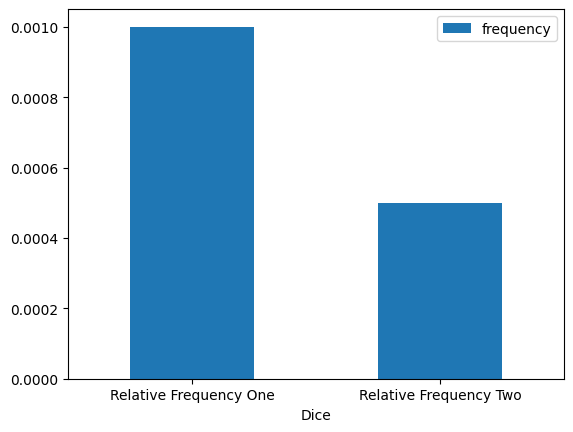

In [31]:
df = pd.DataFrame({'Dice':['Relative Frequency One', 'Relative Frequency Two'], 
                   'frequency':[die_relative_frequency_one,die_relative_frequency_two]})
ax = df.plot.bar(x='Dice', y='frequency', rot=0)

In [32]:
# Compute 10 most frequent combinations of faces for each game
die_analyzer_one.combo() 

5665

In [33]:
# We can utilize the the <Class Analyzer>.combination_list according to the doc
die_analyzer_one.combination_list 
die_analyzer_one.combination_list.sort(key=lambda roll: roll[-1:] , reverse = True)
die_game_one_frequent_combinations = die_analyzer_one.combination_list[:10]
die_game_one_frequent_combinations

[(4, 2, 6, 3, 4, 7),
 (5, 3, 6, 4, 4, 7),
 (1, 1, 3, 3, 1, 6),
 (1, 4, 3, 6, 3, 6),
 (1, 5, 3, 5, 4, 6),
 (2, 1, 5, 6, 4, 6),
 (4, 3, 1, 6, 4, 6),
 (4, 4, 1, 2, 1, 6),
 (4, 4, 1, 6, 1, 6),
 (4, 6, 6, 5, 2, 6)]

In [34]:
die_analyzer_two.combo() 

5651

In [36]:
# We can utilize the the <Class Analyzer>.combination_list according to the doc
die_analyzer_two.combination_list 
die_analyzer_two.combination_list.sort(key=lambda roll: roll[-1:] , reverse = True)
die_game_two_frequent_combinations = die_analyzer_two.combination_list[:10]
die_game_two_frequent_combinations

[(5, 2, 3, 4, 4, 7),
 (5, 2, 6, 5, 1, 7),
 (5, 5, 2, 2, 4, 7),
 (5, 6, 3, 2, 6, 7),
 (1, 4, 5, 2, 4, 6),
 (2, 1, 4, 4, 1, 6),
 (2, 5, 4, 5, 6, 6),
 (3, 1, 1, 3, 4, 6),
 (3, 2, 5, 3, 4, 6),
 (3, 3, 1, 1, 6, 6)]

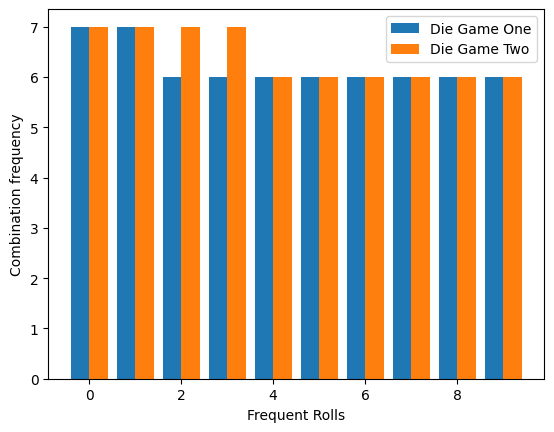

In [37]:
# create data
x = np.arange(10)
combo_one = [list(combo[-1:])[0] for combo in die_game_one_frequent_combinations] # frequent combination Game one
combo_two = [list(combo[-1:])[0] for combo in die_game_two_frequent_combinations]
width = 0.40
  
# plot data in grouped manner of bar type for the Die Games 
plt.bar(x-0.2, combo_one, width)
plt.bar(x+0.2, combo_two, width)
plt.xlabel("Frequent Rolls")
plt.ylabel("Combination frequency")
plt.legend(["Die Game One", "Die Game Two"])
plt.show()

## Scenario 3: Roman Alphabet

In [38]:
# Create a "die" of letter s from a to z with weights based on their frequency of usage.
roman_alphabet_faces = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
roman_alphabet_die = Die(roman_alphabet_faces)
roman_alphabet_die.show_state()

,faces,weights
0,Q,1.0
1,S,1.0
2,R,1.0
3,Z,1.0
4,D,1.0
5,W,1.0
6,G,1.0
7,H,1.0
8,B,1.0
9,A,1.0


[The frequency of the letters of the alphabet in English](https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html)

In [39]:
# We will populate the Die according to the given frequencies

In [40]:
frequency_list = [
('A',8.4966),
('B',2.0720),
('C',4.5388),
('D',3.3844),
('E',11.1607),
('F',1.8121),
('G',2.4705),
('H',3.0034),
('I',7.5448),
('J',0.1965),
('K',1.1016),
('L',5.4893),
('M',3.0129),
('N',6.6544),
('O',7.1635),
('P',3.1671),
('Q',0.1962),
('R',7.5809),
('S',5.7351),
('T',6.9509),
('U',3.6308),
('V',1.0074),
('W',1.2899),
('X',0.2902),
('Y',1.7779),
('Z',0.2722)] 

[roman_alphabet_die.change_weight(str(alphabet[0]) , alphabet[1]) for alphabet in frequency_list]
roman_alphabet_die.show_state()

,faces,weights
0,Q,0.1962
1,S,5.7351
2,R,7.5809
3,Z,0.2722
4,D,3.3844
5,W,1.2899
6,G,2.4705
7,H,3.0034
8,B,2.0720
9,A,8.4966


In [41]:
# Play a game involving 5 of these dice with 1000 rolls.

dice = []
dice.extend([roman_alphabet_die , roman_alphabet_die, roman_alphabet_die, roman_alphabet_die, roman_alphabet_die]) # Playing a Five dice 
roman_game = Game(dice)
roman_game.show(roman_game.play(1000) , 1)  # Displaying results in Wide Dataframe format

,Die 1,Die 2,Die 3,Die 4,Die 5
roll number,,,,,
1,S,A,Q,J,P
2,V,M,O,F,O
3,N,L,V,H,O
4,G,V,W,I,N
5,T,Z,D,Q,R
...,...,...,...,...,...
996,E,N,L,S,J
997,B,N,T,H,K
998,G,T,P,J,D


In [42]:
# Generate 10 random samples of 10 from your data 
sample_value = []
for sample in range(10):
    sample_value.append(tuple(roman_game.play_df.sample(n = 10).sum(axis=1).astype(str)))

In [43]:
# Count the number of times you see a word that looks like an English word in each sample UNIX APPROACH

import re
file = open("/usr/share/dict/words", "r")
words = re.sub("[^\w]", " ",  file.read()).split()
file.close()
    
def is_word(word):
    return word.lower() in words
#How the Simple English word identifier function works
#is_word("The") # Returns true


# Running count to Estimate of the percent of English words in the data. 
# Maintain the count of english word in the data 
count = 0
for word in sample_value:
    for i in range(len(word)):
        if(is_word(word[i])):
            count =count + 1
print(f"{count}%")

0%
